In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [12]:
#so eibar ki hoise, etu ki mean code or, yate ebar ami ki korisu internet or pora direct dataset tu loisu, yar agore ami download kori upload korisilu right, eibar etu koranai
house_price = fetch_california_housing()

In [8]:
print(house_price)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [9]:
# so jihetu ami internet or pora loisu data tu direct heikarne dataset or data bur ulta pulta ke ahe dictionary format ot, table rows and columns ot nahe, so ami table or loi convert koribo lagibo
house_price_dataframe = pd.DataFrame(house_price.data, columns=house_price.feature_names)

In [10]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
house_price_dataframe.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [19]:
# yate saba ki hoi, since amar values bur dictionary t utpat nisina ke asile so ami ki korilu eta new column add korilu price buli tate target mane real answers bur khumai disu, the answers the model will predict
house_price_dataframe['Price']= house_price.target

In [16]:
house_price_dataframe.head(6)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


In [18]:
house_price_dataframe.shape

(20640, 9)

In [21]:
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [22]:
# now yate etu ki hoi?? kele lage?? correlation e amak koi each columns price column tur logt keneke relate hoi, kiman importance hoi, mane kun bur columns amar main target answer( price) column or uprt besi information gom pua jai, or kun bur columns useless kaam nai, hetu gom pai
# jiman e value closer to 1 hoi, khiman e imp hoi column tu, mane judi eta factor barhe price o barhibo, directly proportional hoi like example: more rooms means more price of house, 0 mane relation e nai mane golconda hoi
# -ve correlation mane inversely proportional, imp hoi kintu like example: distance from house barhile price of house decreases
correlation = house_price_dataframe.corr()

<Axes: >

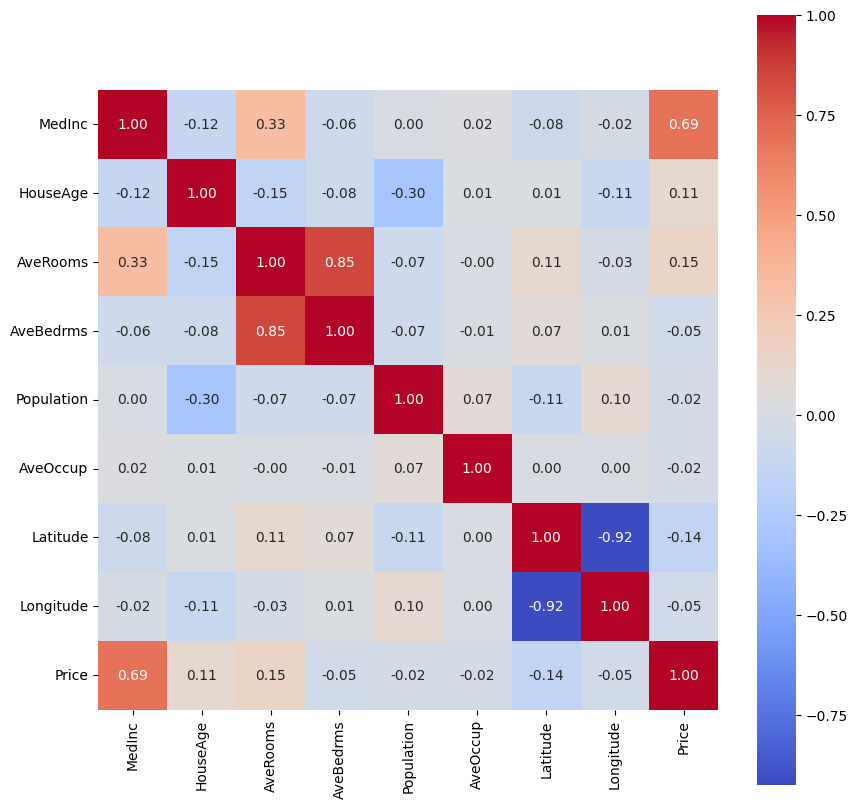

In [25]:
# yate etu code e heatmap bonai diye, yate figsize (10,10)'e size tu dise big size
plt.figure(figsize=(10,10))
# now yate, correlation mane uprt e declare korisu just uprt, and then cbar=true mane side ot je colour bar tu ase sidha hetu diye, square=true 'e perfect square box bonai inside big square
# fmt=.2f e upto 2 decimal place loi diye values, annot=true e box or bhitort correlation values bilak ani diye, cmap=coolwarm e colour bilak dise dhunia colour bur if moi cmap=blues dilu hoi then blue colour ahile hoi
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, cmap='coolwarm')


In [32]:
X = house_price_dataframe.drop(['Price'], axis = 1)
Y = house_price_dataframe['Price']

In [33]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [38]:
# yate ami stratify use kora nai, because stratify classification problems or logt use kora jai, continous values ot nokore
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [40]:
model = XGBRegressor()

In [41]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
training_data_prediction = model.predict(X_train)

In [43]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [45]:
# evaluating using R Square
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# Mean absolute Error korim
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R Square Error: ", score_1)
print("Mean Absolute Error: ", score_2)

# amar answer of Mean absolute error mane jiman e kom value khiman e bhal, yate atia 0.19 hoise tarmane suppose amar house price hoi 10rs amar model e predict koribo close like 9.81 or 10.19


R Square Error:  0.943650140819218
Mean Absolute Error:  0.1933648700612105


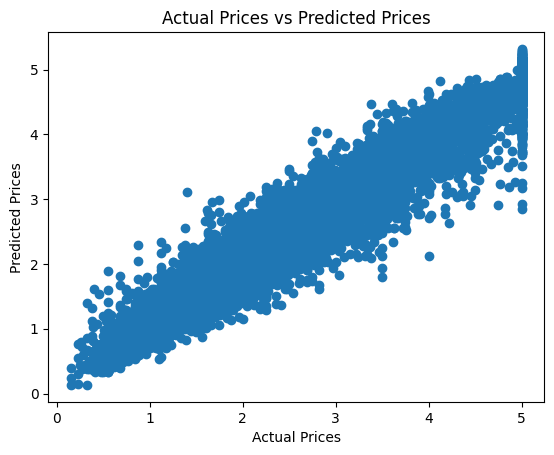

In [46]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [47]:
test_data_prediction = model.predict(X_test)

In [48]:
print(test_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [49]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R Square Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R Square Error:  0.8338000331788725
Mean Absolute Error:  0.3108631800268186


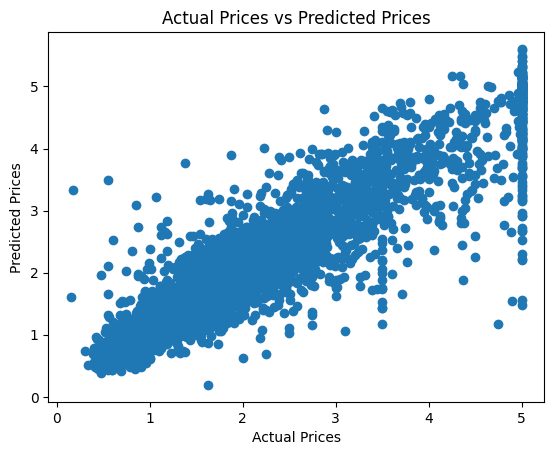

In [50]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [52]:
input_data = (4.0368, 52.0, 4.761658, 1.103627,	413.0,	2.139896,	37.85,	-122.25)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print('House Price Prediction:',prediction)

House Price Prediction: [2.2949164]


In [53]:
import pickle

filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [55]:
from google.colab import files
files.download('trained_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>